In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('./output/organization.csv', encoding='utf8')

In [3]:
df.head()

,artificialPersonName,establishDate,fundCount,fundScale,hasCreditTips,hasSpecialTips,id,inBlacklist,managerHasProduct,managerName,...,primaryInvestType,regAdrAgg,regCoordinate,registerAddress,registerCity,registerDate,registerNo,registerProvince,subscribedCapital,url
0,杨晓华,1300147200000,31,5.782993e+05,False,False,138,False,NaN,平安道远投资管理（上海）有限公司,...,证券投资基金,上海市,"31.2351462103,121.526785265",上海市浦东新区张杨路707号生命人寿大厦39楼03室,浦东新区,1395014400000,P1000182,上海市,8.139547e+05,138.html
1,裘国根,1245974400000,47,8.613844e+05,False,False,194,False,NaN,上海重阳投资管理股份有限公司,...,证券投资基金,上海市,"31.2415506405,121.507641007",上海市浦东新区世纪大道8号国金中心B座51楼5103-5116室,浦东新区,1395014400000,P1000265,上海市,1.411865e+06,194.html
2,蒋锦志,1338940800000,73,1.211353e+06,False,False,211,False,NaN,上海景林资产管理有限公司,...,证券投资基金,上海市,"31.3522870192,121.610842918",上海市浦东新区海徐路,浦东新区,1395014400000,P1000267,上海市,1.346505e+06,211.html
3,周楠,1328832000000,25,8.801801e+05,False,True,172,False,NaN,富舜资产管理（上海）有限公司,...,证券投资基金,上海市,"31.1910702962,121.554320717",上海市浦东新区莲园路100弄4号305室,浦东新区,1395014400000,P1000268,上海市,1.334766e+06,172.html
4,蔡明,1175731200000,21,3.418153e+05,False,True,721,False,NaN,深圳民森投资有限公司,...,证券投资基金,深圳市,"22.5517305724,114.055592754",广东省深圳市福田区,深圳市,1395014400000,P1000269,广东省,3.617142e+05,721.html


In [4]:
df.columns

Index([u'artificialPersonName', u'establishDate', u'fundCount', u'fundScale',
       u'hasCreditTips', u'hasSpecialTips', u'id', u'inBlacklist',
       u'managerHasProduct', u'managerName', u'officeAddress', u'officeCity',
       u'officeCoordinate', u'officeProvince', u'paidInCapital',
       u'primaryInvestType', u'regAdrAgg', u'regCoordinate',
       u'registerAddress', u'registerCity', u'registerDate', u'registerNo',
       u'registerProvince', u'subscribedCapital', u'url'],
      dtype='object')

In [5]:
df.describe()

,establishDate,fundCount,fundScale,id,paidInCapital,registerDate,subscribedCapital
count,1.821200e+04,18212.000000,1.821200e+04,1.821200e+04,1.821200e+04,1.821200e+04,1.821200e+04
mean,1.381158e+12,2.698825,6.365701e+04,1.395460e+14,5.402201e+04,1.437914e+12,6.201006e+04
std,9.654405e+10,8.121318,4.228512e+05,4.532488e+14,3.366650e+05,2.531272e+10,3.880195e+05
min,3.045600e+11,0.000000,0.000000e+00,1.230000e+02,-6.334528e+04,1.395014e+12,0.000000e+00
25%,1.354752e+12,1.000000,5.000000e+02,9.549750e+03,5.179125e+02,1.422490e+12,6.000000e+02
50%,1.415318e+12,1.000000,3.000000e+03,2.377150e+04,3.000000e+03,1.436400e+12,3.308930e+03
75%,1.437696e+12,2.000000,1.881199e+04,4.064450e+04,1.650025e+04,1.450915e+12,2.000000e+04
max,1.484093e+12,538.000000,1.487570e+07,1.701202e+15,1.345231e+07,1.487722e+12,1.487570e+07


In [6]:
fundScale = df[u'fundScale']
fundScale = fundScale[fundScale!=0]

In [7]:
fundScale.describe()

count    1.543900e+04
mean     7.509045e+04
std      4.583246e+05
min      1.202000e+00
25%      1.010000e+03
50%      5.047740e+03
75%      2.473821e+04
max      1.487570e+07
Name: fundScale, dtype: float64

In [8]:
fundScale.median()

5047.74

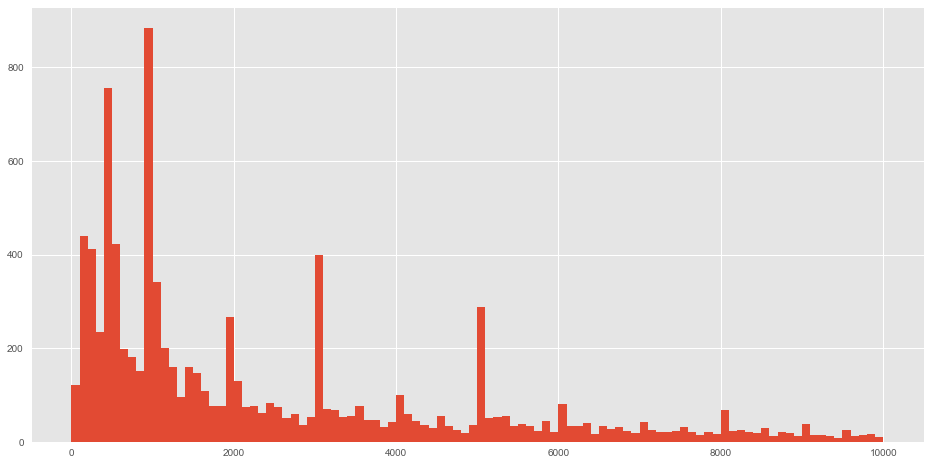

In [12]:
plt.figure(figsize=(16,8))
plt.hist(fundScale[fundScale<1e4], bins=100)
plt.show()

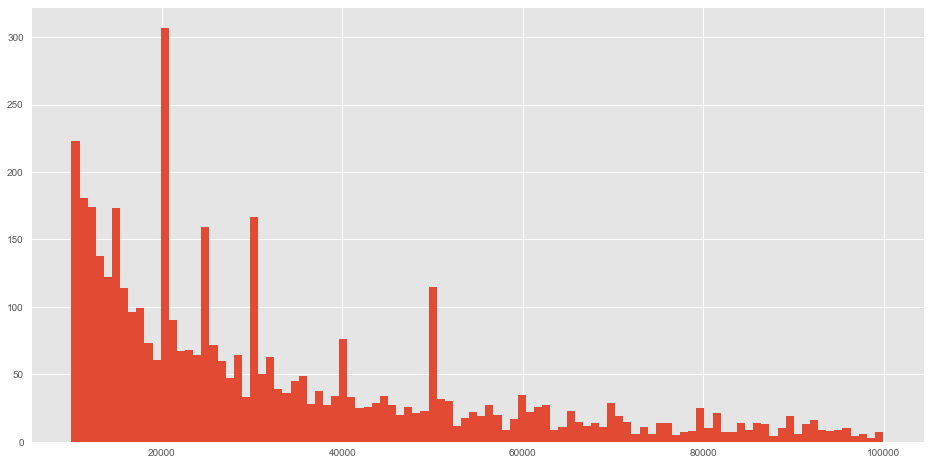

In [13]:
plt.figure(figsize=(16,8))
plt.hist(fundScale[(1e4<fundScale) & (fundScale<1e5)], bins=100)
plt.show()

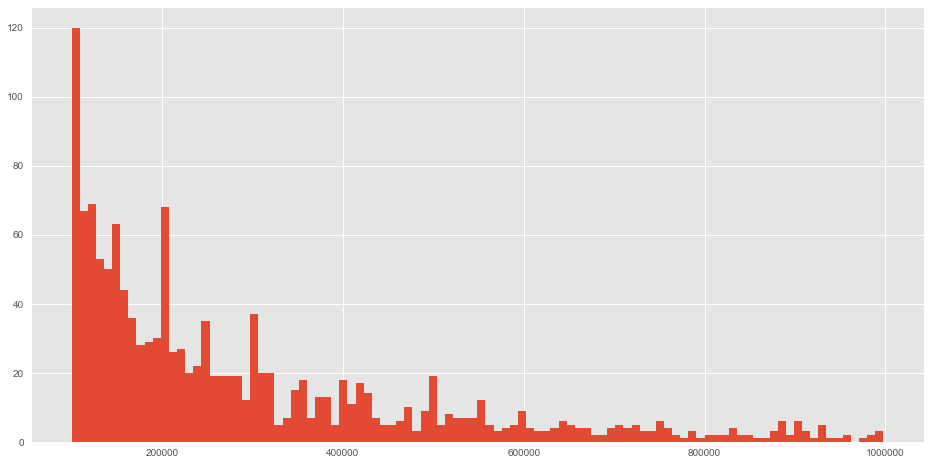

In [14]:
plt.figure(figsize=(16,8))
plt.hist(fundScale[(1e5<fundScale) & (fundScale<1e6)], bins=100)
plt.show()

In [15]:
df.sort_values('fundScale', ascending=False).rank(ascending=False).head(20)

,artificialPersonName,establishDate,fundCount,fundScale,hasCreditTips,hasSpecialTips,id,inBlacklist,managerHasProduct,managerName,...,primaryInvestType,regAdrAgg,regCoordinate,registerAddress,registerCity,registerDate,registerNo,registerProvince,subscribedCapital,url
14531,17289.0,1373.5,430.5,1.0,9614.0,12435.0,2650.0,9108.0,NaN,5758.0,...,11657.0,5726.5,9783.0,3217.0,15863.0,3686.0,3682.0,2463.5,1.0,2530.0
2711,14056.0,11912.0,211.0,2.0,9614.0,12435.0,16889.0,9108.0,NaN,13781.0,...,11657.0,3247.0,16878.5,8373.0,5512.0,15721.0,15483.0,6931.5,4.0,11817.0
5861,16849.5,17104.0,29.0,3.0,9614.0,12435.0,14639.0,9108.0,NaN,3705.0,...,3976.0,3247.0,14027.0,5499.0,5512.0,12367.0,12341.0,6931.5,127.0,1989.0
14953,102.5,3010.0,2389.0,4.0,9614.0,3329.0,4132.0,9108.0,NaN,14144.0,...,17982.0,16202.0,8023.0,16103.0,9118.0,3268.5,3260.0,16202.0,3.0,5082.0
4304,8223.0,15702.5,35.0,5.0,9614.0,12435.0,14600.0,9108.0,NaN,3652.0,...,11657.0,3247.0,13893.5,5495.0,5512.0,13928.5,13885.0,6931.5,115.0,1889.0
1154,17122.0,13182.5,38.0,6.0,9614.0,12435.0,17019.0,9108.0,NaN,13681.0,...,11657.0,16202.0,6929.0,15046.0,2028.0,17158.0,17021.0,16202.0,2.0,12513.0
764,6870.0,17587.5,138.0,7.0,9614.0,12435.0,17335.0,9108.0,NaN,442.0,...,11657.0,9657.5,3971.5,9840.0,3367.5,17431.5,17390.0,9980.5,6.0,16182.0
7671,7741.0,6694.0,26.5,8.0,9614.0,12435.0,9879.0,9108.0,NaN,9330.0,...,11657.0,8950.5,5988.0,9642.0,2539.0,10616.5,10545.0,9663.5,5.0,12230.0
43,5608.5,17034.5,89.0,9.0,9614.0,12435.0,18045.0,9108.0,NaN,13787.0,...,11657.0,9657.5,3971.5,10013.0,3367.5,18187.5,17982.0,9980.5,7.0,5604.0
579,15728.5,11198.0,155.5,10.0,9614.0,12435.0,15780.0,9108.0,NaN,16228.0,...,11657.0,16202.0,7766.0,14324.0,66.0,17697.5,17552.0,16202.0,8.0,5503.0


In [16]:
df[df['primaryInvestType'] == u'证券投资基金'].describe()

,establishDate,fundCount,fundScale,id,paidInCapital,registerDate,subscribedCapital
count,7.951000e+03,7951.000000,7.951000e+03,7.951000e+03,7.951000e+03,7.951000e+03,7.951000e+03
mean,1.383896e+12,3.567727,3.859232e+04,7.329966e+13,4.485586e+04,1.435665e+12,3.596429e+04
std,9.692988e+10,10.798971,2.893544e+05,3.356348e+14,3.269746e+05,2.185481e+10,2.119252e+05
min,4.548960e+11,0.000000,0.000000e+00,1.230000e+02,-6.334528e+04,1.395014e+12,0.000000e+00
25%,1.372982e+12,1.000000,5.000000e+02,1.032300e+04,5.486900e+02,1.422490e+12,6.000000e+02
50%,1.418170e+12,1.000000,1.578310e+03,2.242300e+04,2.000000e+03,1.435536e+12,2.000000e+03
75%,1.435882e+12,3.000000,7.831240e+03,3.625450e+04,1.013936e+04,1.446682e+12,9.385786e+03
max,1.480637e+12,538.000000,1.344697e+07,1.612302e+15,1.345231e+07,1.487722e+12,8.353935e+06


In [17]:
df[df['primaryInvestType'] == u'证券投资基金'].sort_values('fundScale', ascending=False).rank(ascending=False).loc[1251, :]

artificialPersonName    2683.0
establishDate           5847.5
fundCount                263.0
fundScale                558.0
hasCreditTips           4151.5
hasSpecialTips          5044.0
id                      7823.0
inBlacklist             3976.0
managerHasProduct          NaN
managerName             5031.0
officeAddress           4829.0
officeCity              3105.0
officeCoordinate         286.0
officeProvince          5069.0
paidInCapital            446.0
primaryInvestType       3976.0
regAdrAgg               5049.5
regCoordinate            390.5
registerAddress         4902.0
registerCity            3481.5
registerDate            7493.0
registerNo              7478.0
registerProvince        5049.5
subscribedCapital        438.0
url                     1437.0
Name: 1251, dtype: float64

In [18]:
df.sort_values('fundScale', ascending=False)[['managerName', 'fundScale', 'artificialPersonName', 'primaryInvestType']].head(20)

,managerName,fundScale,artificialPersonName,primaryInvestType
14531,浦银（嘉兴）股权投资管理有限公司,1.487570e+07,余晓东,股权投资基金
2711,信银（深圳）股权投资基金管理有限公司,1.431398e+07,孙莉,股权投资基金
5861,深圳市平安德成投资有限公司,1.344697e+07,刘东,证券投资基金
14953,中银城市发展资产管理（上海）有限公司,1.200375e+07,黎晓静,其他投资基金
4304,深圳市思道科投资有限公司,1.131716e+07,沈佳华,股权投资基金
1154,兴业国信资产管理有限公司,1.113325e+07,倪勤,股权投资基金
764,长城（天津）股权投资基金管理有限责任公司,1.096000e+07,王海,股权投资基金
7671,安徽国厚投资管理有限公司,1.093735e+07,王东,股权投资基金
43,信达资本管理有限公司,1.057465e+07,肖林,股权投资基金
579,上海浦耀信晔投资管理有限公司,1.033596e+07,叶力俭,股权投资基金


In [19]:
df[df['primaryInvestType'] == u'证券投资基金'].sort_values('fundScale', ascending=False)[['managerName', 'fundScale', 'artificialPersonName', 'primaryInvestType']].head(20)

,managerName,fundScale,artificialPersonName,primaryInvestType
5861,深圳市平安德成投资有限公司,1.344697e+07,刘东,证券投资基金
3128,恒天中岩投资管理有限公司,9.929267e+06,李刚,证券投资基金
4824,植瑞投资管理有限公司,7.809365e+06,于红梅,证券投资基金
4232,大唐财富投资管理有限公司,6.413755e+06,张树林,证券投资基金
10392,深圳阳宏资产管理有限公司,5.000050e+06,肖征,证券投资基金
8853,上海融葵投资管理有限公司,4.720466e+06,王长松,证券投资基金
3240,陆家嘴财富管理（上海）有限公司,3.923962e+06,何勇,证券投资基金
51,北京乐瑞资产管理有限公司,3.636076e+06,唐毅亭,证券投资基金
23,上海合晟资产管理股份有限公司,3.558545e+06,胡远川,证券投资基金
153,北京佑瑞持投资管理有限公司,3.509185e+06,高蕾,证券投资基金


In [20]:
df[df['artificialPersonName'] == u'秦志宇'][['managerName', 'fundScale', 'artificialPersonName', 'primaryInvestType']]

,managerName,fundScale,artificialPersonName,primaryInvestType
1251,北京涵德投资管理有限公司,75676.13,秦志宇,证券投资基金


In [22]:
production = pd.read_csv('./output/production.csv', encoding='utf8')
production.head()

,establishDate,fundName,fundNo,id,isDeputeManage,lastQuarterUpdate,managerName,managerType,managerUrl,putOnRecordDate,url,workingState
0,1.395878e+12,嘉兴全意投资合伙企业,SD3113,133588,不适用,True,子川天丰（天津）能源投资有限公司,自我管理,../manager/3335.html,1369526400000,133588.html,正在运作
1,1.392077e+12,友山腾达-天弘天方1号专项资产管理计划,04390118,128501,不适用,False,友山基金管理有限公司,顾问管理,../manager/294.html,1395014400000,128501.html,提前清盘
2,1.386893e+12,东海基金-东航期货-健峰凌云1号资产管理计划,0BA016,129680,不适用,False,东航金控有限责任公司,顾问管理,../manager/142.html,1395014400000,129680.html,NaN
3,1.384474e+12,万家共赢歌斐诺宝精选组合1号专项资产管理计划,200100,128363,不适用,False,歌斐诺宝（上海）资产管理有限公司,顾问管理,../manager/137.html,1395014400000,128363.html,NaN
4,1.369354e+12,广发昭时一期集合资产管理计划,870015,128956,不适用,False,广州昭时投资合伙企业（有限合伙）,顾问管理,../manager/550.html,1395014400000,128956.html,正在运作


In [23]:
production[production['managerName'] == u'浦银（嘉兴）股权投资管理有限公司'][['fundName', 'managerType', 'workingState', 'lastQuarterUpdate']]

,fundName,managerType,workingState,lastQuarterUpdate
48278,杭州临经浦银投资管理合伙企业 （有限合伙）,受托管理,正在运作,False
51050,杭州临安金浦投资管理合伙企业（有限合伙）,受托管理,正在运作,False
52174,楚雄浦发扶贫投资发展基金（有限合伙）,受托管理,正在运作,False
53193,黔东南州浦发生态脱贫投资发展基金管理中心（有限合伙）,受托管理,正在运作,False
53219,红河浦发旅游投资基金（有限合伙）,受托管理,正在运作,False
53223,普洱浦发扶贫投资发展基金合伙企业（有限合伙）,受托管理,正在运作,False
53224,曲靖浦发扶贫投资发展基金合伙企业（有限合伙）,受托管理,正在运作,False
53435,文山浦发滇桂黔石漠化片区扶贫投资发展基金合伙企业（有限合伙）,受托管理,正在运作,False
53459,昭通浦发乌蒙山片区扶贫投资发展基金合伙企业（有限合伙）,受托管理,正在运作,False
53507,德宏浦发扶贫投资发展基金合伙企业（有限合伙）,受托管理,正在运作,False


In [24]:
df.describe()

,establishDate,fundCount,fundScale,id,paidInCapital,registerDate,subscribedCapital
count,1.821200e+04,18212.000000,1.821200e+04,1.821200e+04,1.821200e+04,1.821200e+04,1.821200e+04
mean,1.381158e+12,2.698825,6.365701e+04,1.395460e+14,5.402201e+04,1.437914e+12,6.201006e+04
std,9.654405e+10,8.121318,4.228512e+05,4.532488e+14,3.366650e+05,2.531272e+10,3.880195e+05
min,3.045600e+11,0.000000,0.000000e+00,1.230000e+02,-6.334528e+04,1.395014e+12,0.000000e+00
25%,1.354752e+12,1.000000,5.000000e+02,9.549750e+03,5.179125e+02,1.422490e+12,6.000000e+02
50%,1.415318e+12,1.000000,3.000000e+03,2.377150e+04,3.000000e+03,1.436400e+12,3.308930e+03
75%,1.437696e+12,2.000000,1.881199e+04,4.064450e+04,1.650025e+04,1.450915e+12,2.000000e+04
max,1.484093e+12,538.000000,1.487570e+07,1.701202e+15,1.345231e+07,1.487722e+12,1.487570e+07
